In [1]:
%config IPCompleter.greedy=True
%matplotlib inline

import pandas as pd
import numpy as np

df_train = pd.read_csv('train_kaggle.csv')
df_test = pd.read_csv('sample_solution.csv')
Y = df_train['Label'].values
dataframes = np.load('allData.npy', allow_pickle = True)

In [2]:
def load_test_dataframe(id):
    test_data = np.load("test/test/{}.npy".format(id))
    return pd.DataFrame(data=test_data)

testdatas = []
for id in df_test['Id']:
    dfi = load_test_dataframe(id)
    testdatas.append(dfi.values)

In [3]:
dfLens = []
for df in dataframes:
    dfLens.append(df.shape[0])
np.min(dfLens)

38

In [4]:
def pad_data(dfs):
    padsize = 500
    data = []
    for df in dfs:
        diff = padsize-df.shape[0]
        if diff >0:
            df = np.pad(df, [(0, diff), (0,0)], 'constant')
        else:
            df = df[:padsize]
        data.append(df)
        
    data = np.stack(data)
    return data

XTrain = pad_data(dataframes)
XTest = pad_data(np.array(testdatas))

In [5]:
import sklearn as sk
from sklearn.metrics import pairwise_distances

# Convert time series to image based on https://www.kaggle.com/tigurius/recuplots-and-cnns-for-time-series-classification
#modified from https://stackoverflow.com/questions/33650371/recurrence-plot-in-python
def recurrence_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    d = pairwise_distances(s)
    d = np.floor(d / eps)
    d[d > steps] = steps
    #Z = squareform(d)
    return d

In [6]:
XTrain = np.array(list(map(recurrence_plot, XTrain)))
XTrain.shape

(18662, 100, 100)

In [7]:
XTest = np.array(list(map(recurrence_plot, XTest)))
XTest.shape

(6051, 100, 100)

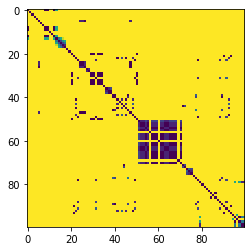

In [8]:
import matplotlib.pyplot as plt

plt.imshow(XTrain[0])

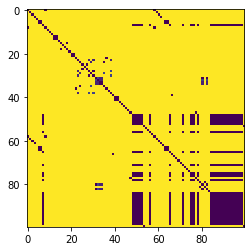

In [9]:
plt.imshow(XTrain[1])

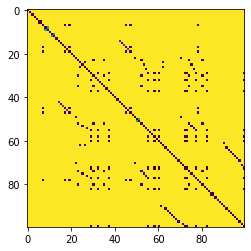

In [10]:
plt.imshow(XTrain[2])

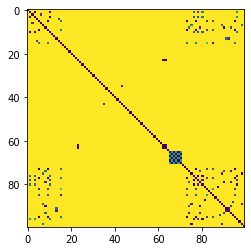

In [11]:
plt.imshow(XTrain[3])

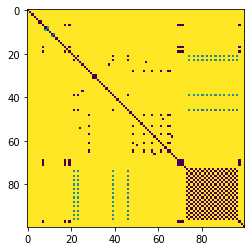

In [12]:
plt.imshow(XTrain[4])

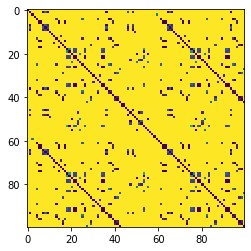

In [13]:
plt.imshow(XTrain[5])

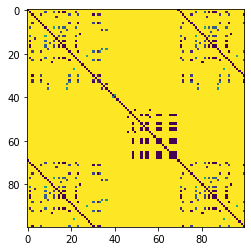

In [14]:
plt.imshow(XTrain[217])

In [18]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import gc

def save_as_image(data, folder, y = []):
    y = np.array(y)
    for i in tqdm(range(data.shape[0])):
        img_id = str(i) + '.png'
        if y.shape[0] == data.shape[0]:
            class_dir = str(y[i])
            class_folder = folder + '/' + class_dir            
        else:
            class_folder = folder
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)
        img_dir = class_folder + '/' + img_id
        plt.figure(figsize=(8, 8))
        plt.imshow(data[i], cmap='binary', origin='lower')
        plt.title('Joint Recurrence Plot', fontsize=16)
        plt.savefig(img_dir, transparent=True)
        plt.close()
        gc.collect()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(XTrain, Y, test_size=0.2, random_state=42)


  0%|▏                                                     | 36/14929 [00:08<54:36,  4.54it/s]ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-2c2acc882fe9>", line 1, in <module>
    save_as_image(X_train, 'image/train', y_train)
  File "<ipython-input-18-fd59ee197ce9>", line 21, in save_as_image
    plt.savefig(img_dir, transparent=True)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 722, in savefig
    res = fig.savefig(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py", line 2180, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backend_bases.py", line 2082, in print_figure
    **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py", line 527, in print_png
    FigureCanvasAgg.draw(self)
  File "C:\ProgramData\Anaconda3\lib\s

KeyboardInterrupt: 

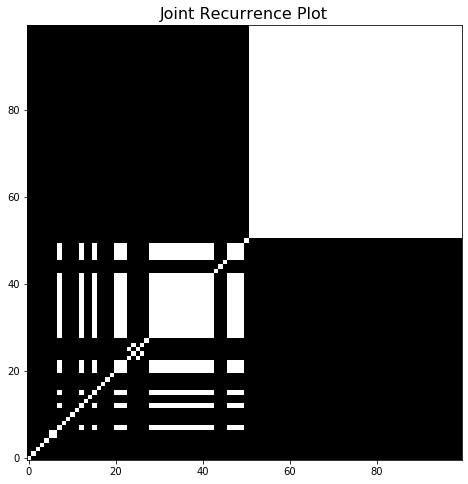

In [20]:
save_as_image(X_train, 'image/train', y_train)

In [ ]:
save_as_image(X_val, 'image/valid', y_val)

In [ ]:
save_as_image(XTest, 'image/test')